In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP
using HDF5
using Random123

In [2]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT

In [39]:
# Thesis: 

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [4]:
include("../model-41/likelihood.jl")
include("../model-41/utill_model.jl")
include("../utill.jl")

plot_projections_prl (generic function with 1 method)

In [5]:
function get_quantiles(data, qvals)
    
    qvals = sort(qvals)
    ampvals = sort([data...], rev=true)
    cumsumvals = cumsum(ampvals)
    
    levels_array = []
    
    levels_array = [ampvals[argmin(abs.(cumsumvals .- q))] for q in qvals]
    quantiles_labels = ["$(x*100)\\%" for x in qvals]
    
    sort_ind = sortperm(levels_array)
    
    return levels_array[sort_ind], quantiles_labels[sort_ind]
end

get_quantiles (generic function with 1 method)

In [6]:
β1= 0.015
β2 = 0.0077
β3 = 0.0058 

prior = NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.03, 0.19), truncated(Normal(0.2, 0.04), 0.03, 0.19)],
        tr_size_2 = [truncated(Normal(0.2, 0.04), 0.03, 0.19), truncated(Normal(0.2, 0.04), 0.03, 0.19)],
        ang_spr = [truncated(Normal(4.0, 2.0), 1.0, 8.0), truncated(Normal(4.0, 2.0), 1.0, 8.0)],
        ang_spr_2 = [truncated(Normal(4.0, 2.0), 1.0, 4.0), truncated(Normal(4.0, 2.0), 1.0, 4.0)],
        mixt_pow =  0.35 .. 1.0, 
        waist = [truncated(Normal(2.774, 0.03), 2.5, 3.6)],
        waist_2 = [truncated(Normal(2.774, 0.03), 2.5, 3.6)],
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9, 
        resx = [1, 1, 1], # 23, 24, 25, 
        resy = [1, 1, 1], # 26,27, 28, 
        cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
        cam4_resy = truncated(Normal(3, 1.5), 0, Inf), 
        psx = [27.1, 21.6, 114.0], # 31, 32, 33
        psy = [30.5, 23.4, 125.0], # 34, 35, 36
        cam4_psx = 121.8, # 37
        cam4_psy = 120.0, # 38
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.47799, 15.025999, 23.1644],
);


In [7]:
samples_nt = bat_read("../../data/sampling_results/Benchmark-16/samples-hc-90-nontruncated.hdf5").result
samples_nt = varshape(prior).(samples_nt);

In [8]:
samples_t = bat_read("../../data/sampling_results/Benchmark-16/samples-hc-90-truncated.hdf5").result
samples_t = varshape(prior).(samples_t);

In [9]:
samples_nt = bat_sample(samples_nt, OrderedResampling(nsamples=10^4)).result;

┌ Info: Initializing new RNG of type Philox4x{UInt64, 10}
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


In [10]:
samples_t = bat_sample(samples_t, OrderedResampling(nsamples=10^4)).result;

┌ Info: Initializing new RNG of type Philox4x{UInt64, 10}
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


In [11]:
mean_nt = unshaped(mean(samples_nt));

In [12]:
labels = [
    L"\sigma_{c,x}", 
    L"\sigma_{c,y}", 
    L"\sigma_{h,x}", 
    L"\sigma_{h,y}", 
    L"\sigma'_{c,x}", 
    L"\sigma'_{c,y}", 
    L"\sigma'_{h,x}", 
    L"\sigma'_{h,y}", 
    L"\alpha",
    L"s_{w,c}",
    L"s_{w,h}",
    L"\mu_{1,x}", 
    L"\mu_{2,x}",
    L"\mu_{3,x}", 
    L"\mu_{4,x}",
    L"\mu_{1,y}", 
    L"\mu_{2,y}",
    L"\mu_{3,y}", 
    L"\mu_{4,y}",
    L"p_4", 
    L"f_4", 
    L"i_4", 
    L"\tilde{\sigma}_{4,x}", 
    L"\tilde{\sigma}_{4,y}",
    L"i_1", 
    L"i_2", 
    L"i_3"
];

ind_sorted = [3,4,1,2,7,8,5,6,9,11,10,12,13,14,15,16,17,18,18,20,21,22,23,24,25,26,27,];

In [34]:
samples_flat_nt = flatview(unshaped.(samples_nt.v)) ./mean_nt
samples_flat_t = flatview(unshaped.(samples_t.v)) ./mean_nt;

In [35]:
data_nt = [i for i in eachrow(samples_flat_nt)];
quant_nt = [(0.05, 0.95) for i in eachrow(samples_flat_nt)];

In [36]:
data_t = [i for i in eachrow(samples_flat_t)];
quant_t = [(0.05, 0.95) for i in eachrow(samples_flat_t)];

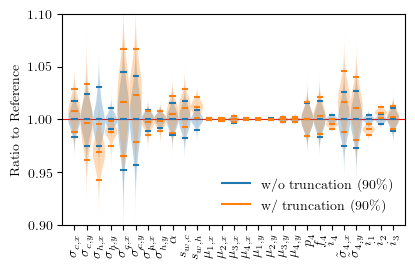

In [45]:
fig, ax = plt.subplots(1,1, figsize=(4.429223744292238, 2.737410817750676))

ax.axhline(1.0, linestyle="-", lw=0.8, color="red", alpha=1.0, zorder=0)

parts = ax.violinplot(data_nt[ind_sorted], widths = 1.0, vert=true, showmeans=true, showextrema=false, quantiles=quant_nt[ind_sorted])

parts = ax.violinplot(data_t[ind_sorted], widths = 1.0, vert=true, showmeans=true, showextrema=false, quantiles=quant_t[ind_sorted],)

ax.plot([-10, -20], color=:C0, label="w/o truncation (90\\%)")
ax.plot([-10, -20], color=:C1, label="w/  truncation (90\\%)")

ax.set_xlim(0.0, length(data_nt)+1)

ax.set_xticks(collect(Base.OneTo(length(data_nt))))
ax.set_xticklabels(labels, rotation = 90, ha="center")
# ax.legend(loc="upper left")
ax.set_ylabel("Ratio to Reference")

ax.legend(framealpha=0.0, loc="lower right")
# ax.set_title("Experimental Event")
ax.set_ylim(0.9, 1.10)

# fig.savefig("../../plots-prl/toy-violin-truncation-hc.pdf", bbox_inches = "tight")

# fig.savefig("../../plots/experiment-violin-truncation-hc.pdf", bbox_inches = "tight")

In [17]:
samples_nt = bat_read("../../data/sampling_results/Benchmark-16/samples-hc-90-nontruncated.hdf5").result
samples_nt = varshape(prior).(samples_nt);

In [20]:
samples_t = bat_read("../../data/sampling_results/Benchmark-16/samples-hc-90-truncated.hdf5").result
samples_t = varshape(prior).(samples_t);

In [21]:
samples_flat_nt = flatview(unshaped.(samples_nt.v)) 
samples_flat_t = flatview(unshaped.(samples_t.v));

In [22]:
function make_hist(xs, ys, w; nbins=50)
    hst = fit(Histogram, (xs,ys), weights(w), nbins=nbins)
    hst = normalize(hst, mode=:probability)
end

make_hist (generic function with 1 method)

In [23]:
hist_nt_1 = make_hist(samples_flat_nt[1,:], samples_flat_nt[2,:], samples_nt.weight);
hist_t_1 = make_hist(samples_flat_t[1,:], samples_flat_t[2,:], samples_t.weight);

hist_nt_2 = make_hist(samples_flat_nt[3,:], samples_flat_nt[4,:], samples_nt.weight);
hist_t_2 = make_hist(samples_flat_t[3,:], samples_flat_t[4,:], samples_t.weight);

In [24]:
xmin, xmax = 0.03, 0.19
xrange=range(xmin, stop = xmax,length=100)
yrange=range(xmin, stop = xmax,length=100)
xvals = diff(cdf.(truncated(Normal(0.2, 0.04), 0.03, 0.19), xrange))
yvals = diff(cdf.(truncated(Normal(0.2, 0.04), 0.03, 0.19), yrange))
z = xvals*yvals';

In [25]:
# quantiles_array = [0.0, 0.80, 0.9, 0.95, 0.985, 0.999, 1]
quantiles_array = [0.0, 0.9, 0.95, 0.999, 1]

levels, level_labels = get_quantiles(z./sum(z), quantiles_array);

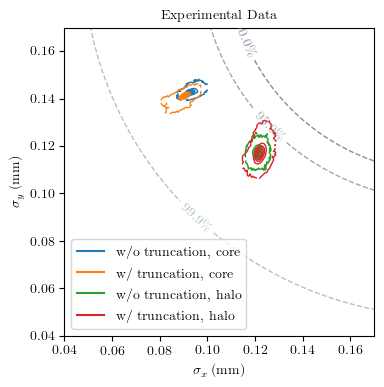

PyObject Text(24.336632052546015, 0.5, '$\\sigma_y \\; (\\mathrm{mm})$')

In [26]:
fig, ax = plt.subplots(1,1, figsize=(4.0, 4.0))

colors_tmp = [plt.cm.bone_r(i) for i in range(0.1, stop=0.6, length=length(levels))[2:end]]
cs = ax.contour(midpoints(xrange), midpoints(yrange), z./sum(z), levels=levels, colors=colors_tmp, alpha=0.7, antialiased=true, linewidths=1.0, linestyles="dashed") 

ax.contour(midpoints(hist_nt_1.edges[1]), midpoints(hist_nt_1.edges[2]), hist_nt_1.weights', levels=5, linewidths=1, colors=:C0)
ax.contour(midpoints(hist_t_1.edges[1]), midpoints(hist_t_1.edges[2]), hist_t_1.weights', levels=5,   linewidths=1,  colors=:C1)

ax.contour(midpoints(hist_nt_2.edges[1]), midpoints(hist_nt_2.edges[2]), hist_nt_2.weights', levels=5,  linewidths=1, colors=:C2)
ax.contour(midpoints(hist_t_2.edges[1]), midpoints(hist_t_2.edges[2]), hist_t_2.weights', levels=5,  linewidths=1,  colors=:C3)

ax.set_xlim(0.04, 0.17)
ax.set_ylim(0.04, 0.17)

ax.plot([-1, -2], [-1, -2], color=:C0, label="w/o truncation, core")
ax.plot([-1, -2], [-1, -2], color=:C1, label="w/ truncation, core")

ax.plot([-1, -2], [-1, -2], color=:C2, label="w/o truncation, halo")
ax.plot([-1, -2], [-1, -2], color=:C3, label="w/ truncation, halo")

ax.clabel(cs, fmt = Dict(zip(levels, level_labels)), inline = 1);

ax.legend(loc="lower left")
ax.set_title("Experimental Data")

ax.set_xlabel(L"\sigma_x \; (\mathrm{mm})")
ax.set_ylabel(L"\sigma_y \; (\mathrm{mm})")

# fig.savefig("../../plots-prl/contours-truncation-1.pdf", bbox_inches = "tight")

In [27]:
hist_nt_1 = make_hist(samples_flat_nt[5,:], samples_flat_nt[6,:], samples_nt.weight);
hist_t_1 = make_hist(samples_flat_t[5,:], samples_flat_t[6,:], samples_t.weight);

hist_nt_2 = make_hist(samples_flat_nt[7,:], samples_flat_nt[8,:], samples_nt.weight);
hist_t_2 = make_hist(samples_flat_t[7,:], samples_flat_t[8,:], samples_t.weight);

In [28]:
xmin, xmax = 1., 8.
xrange=range(xmin, stop = xmax,length=100)
yrange=range(xmin, stop = xmax,length=100)
xvals = diff([cdf(truncated(Normal(4.0, 2.0), 1.0, 8.0), x) for x in xrange])
yvals = diff([cdf(truncated(Normal(4.0, 2.0), 1.0, 8.0), y)  for y in yrange])
z = xvals*yvals';

In [29]:
# quantiles_array = [0.0, 0.80, 0.9, 0.95, 0.985, 0.999, 1]
quantiles_array = [0.0, 0.9, 0.95, 0.999, 1]

levels, level_labels = get_quantiles(z./sum(z), quantiles_array);

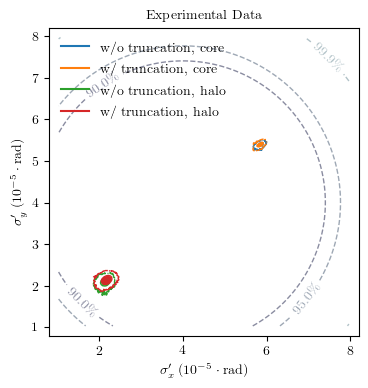

PyObject Text(26.567451389429394, 0.5, "$\\sigma'_y \\; (\\mathrm{10^{-5} \\cdot rad})$")

In [30]:
fig, ax = plt.subplots(1,1, figsize=(4.0, 4.0))

colors_tmp = [plt.cm.bone_r(i) for i in range(0.1, stop=0.6, length=length(levels))[2:end]]
cs = ax.contour(midpoints(xrange), midpoints(yrange), z./sum(z), levels=levels, colors=colors_tmp, alpha=0.7, antialiased=true, linewidths=1.0, linestyles="dashed") 

ax.contour(midpoints(hist_nt_1.edges[1]), midpoints(hist_nt_1.edges[2]), hist_nt_1.weights', levels=5, linewidths=1, colors=:C0)
ax.contour(midpoints(hist_t_1.edges[1]), midpoints(hist_t_1.edges[2]), hist_t_1.weights', levels=5,   linewidths=1,  colors=:C1)

ax.contour(midpoints(hist_nt_2.edges[1]), midpoints(hist_nt_2.edges[2]), hist_nt_2.weights', levels=5,  linewidths=1, colors=:C2)
ax.contour(midpoints(hist_t_2.edges[1]), midpoints(hist_t_2.edges[2]), hist_t_2.weights', levels=5,  linewidths=1,  colors=:C3)

ax.set_xlim(0.8, 8.2)
ax.set_ylim(0.8, 8.2)

ax.plot([-1, -2], [-1, -2], color=:C0, label="w/o truncation, core")
ax.plot([-1, -2], [-1, -2], color=:C1, label="w/ truncation, core")

ax.plot([-1, -2], [-1, -2], color=:C2, label="w/o truncation, halo")
ax.plot([-1, -2], [-1, -2], color=:C3, label="w/ truncation, halo")

ax.clabel(cs, fmt = Dict(zip(levels, level_labels)), inline = 1);

ax.legend(loc="upper left", framealpha=0.0)

ax.set_title("Experimental Data")

ax.set_xlabel(L"\sigma'_x \; (\mathrm{10^{-5} \cdot rad})")
ax.set_ylabel(L"\sigma'_y \; (\mathrm{10^{-5} \cdot rad})")

# fig.savefig("../../plots-prl/contours-truncation-2.pdf", bbox_inches = "tight")

In [ ]:
counts,ybins,xbins,image = ax.hist2d(samples_flat_nt[1,:], samples_flat_nt[2,:], weights=samples_nt.weight);
counts2,ybins2,xbins2,image2 = ax.hist2d(samples_flat_t[1,:], samples_flat_t[2,:], weights=samples_t.weight);

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5.905631659056317, 5.905631659056317))

ax.contour(counts,extent=[minimum(xbins),maximum(xbins),minimum(ybins),maximum(ybins)],linewidths=3)
ax.contour(counts2,extent=[minimum(xbins2),maximum(xbins2),minimum(ybins2),maximum(ybins2)],linewidths=3, linestyles=:dashed)

In [ ]:
xbins